<a href="https://colab.research.google.com/github/andheartsjaz/Public/blob/master/feature_variable_worksheett_final_model_prep_checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import chisquare
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', 100)
plt.style.use('dark_background')

In [0]:
# Zip file contains only the csv, so you can access it directly with read_csv
df = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/diabetic-data-cleaning.zip', 
                 compression='zip')
# Read through this and figure out what we're doing here
for col in df.describe().columns:
    nanidx = df[col].sample(frac=np.random.uniform(0.0, 0.001)).index
    df.loc[nanidx, col] = '?'

In [3]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


# Problematic Variables

In [0]:
# Function for making lists of mixed character values

df.diag_3.unique()

num_list = []
alph_list = []

for i in df.diag_3.unique():
    try:
        num_list += [float(i)]
    except ValueError:
        alph_list += [i]

        
v_list = [dia for dia in alph_list if dia[0] == "V" ]
e_list = [dia for dia in alph_list if dia[0] == "E" ]


In [0]:
# Filtering for strings using the iloc method to sort columns

filter_e = df.diag_3.str.contains('E')
diag_e = df.iloc[filter_e.values]

# Select the columns that you want for your analysis

diag_e = diag_e[['diag_3', 'patient_nbr']]

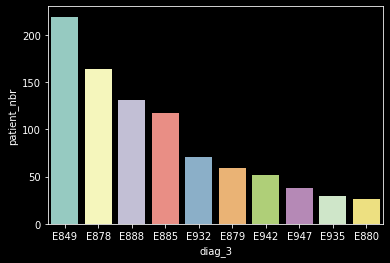

In [6]:
# Grouping by diagnosis counts

g_diag_e = diag_e.groupby(['diag_3']).count()


# Sort by highest patients

x = g_diag_e.sort_values(['patient_nbr'], ascending=False)


# Create a dataframe with only the top 10 and reset the index

plot = x.head(10).reset_index()


# Make barplot using x and y vales

sns.barplot(x="diag_3", y="patient_nbr", data=plot)
plt.show()

# Create Ordinal Value Colums

In [0]:
# create dummy columns

g_df = df[['gender']]

g_df2 = pd.get_dummies(g_df.gender, dummy_na=True)

In [8]:
# convert a series into a dataframe using sum or count

s_ser = g_df2.sum()

d = {key: [value] for (key, value) in s_ser.iteritems()}

pd.DataFrame(d)

,Female,Male,Unknown/Invalid,NaN
0,54708,47055,3,0


# Create a Crosstable

In [0]:
d = {
    
    'NO': 0,
    '>30': 1,
    '<30': 1,
    '?': np.nan
}

In [0]:
df = df.replace(d)

In [0]:
# use the pandas .cut() function as below to dice up the data into useable categories

cat = pd.cut(df.num_medications,bins=[0,26,44,62,81],labels=['0-26', '27-44','45-62','63-81'])

df = df[['num_medications', 'readmitted', 'num_procedures']]


In [0]:
df.insert(3, 'med_cat', cat)

In [0]:
df

,num_medications,readmitted,num_procedures,med_cat
0,1.0,0,0.0,0-26
1,18.0,1,0.0,0-26
2,13.0,0,5.0,0-26
3,16.0,0,1.0,0-26
4,8.0,0,0.0,0-26
...,...,...,...,...
101761,16.0,1,0.0,0-26
101762,18.0,0,3.0,0-26
101763,9.0,0,0.0,0-26
101764,21.0,0,2.0,0-26


In [0]:
cross = pd.crosstab(df.readmitted, df.med_cat)

In [0]:
cross

med_cat,0-26,27-44,45-62,63-81
readmitted,,,,
0,49608,4656,523,41
1,42345,4230,267,27


In [0]:
# perform a chisquare test

s, p = chisquare(cross)

In [0]:
# view the array of probabilities
p

array([8.90912043e-127, 6.20893481e-006, 8.38594785e-020, 8.95550744e-002])

In [0]:
# calling the value in the array gives nonscientific notation (rounding for clarity):
round(p[3], 4)

0.0896

Therefore the biggest difference is in the highest medication category.